# Intership ID : H2HBABBA1322

## Name : APURBA KHANRA  [House Emily]

In [1]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import VarianceThreshold

In [2]:
#Reading the dataset file
data = pd.read_csv('H2HBABBA1322.csv')

#Checking the number of rows and columns
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-12-13 00:00:00,2019.0,1.930209e+09,2019-12-03,20191202,20191203,20191218.0,USD,RV,1.0,NaN,683.91,20191203.0,NAH4,1.930209e+09,0
1,U001,0100004744,J & J trust,2020-02-04 00:00:00,2020.0,1.930397e+09,2020-01-15,20200115,20200115,20200204.0,USD,RV,1.0,NaN,12179.44,20200115.0,NAD1,1.930397e+09,0
2,U001,0200726979,BJ'S co,2020-02-21 00:00:00,2020.0,1.930485e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,1.0,NaN,349.84,20200206.0,NAA8,1.930485e+09,0
3,U001,0200712105,WALG llc,2020-03-11 00:00:00,2020.0,1.930546e+09,2020-02-21,20200220,20200221,20200307.0,USD,RV,1.0,NaN,1130.58,20200221.0,NAA8,1.930546e+09,0
4,U001,0200777735,NASH us,2019-02-25 00:00:00,2019.0,1.928783e+09,2019-02-11,20190212,20190211,20190226.0,USD,RV,1.0,NaN,22791.44,20190211.0,NAA8,1.928783e+09,0


## Null Imputation

In [3]:
#Checking 
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                   11
isOpen                        0
dtype: int64

In [4]:
#Dropping the area_business column as it is 100% null
#Not doing any modifications in clear_date as it is our Target Column

data.drop('area_business',axis=1,inplace=True)

#Checking the dataset
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-12-13 00:00:00,2019.0,1.930209e+09,2019-12-03,20191202,20191203,20191218.0,USD,RV,1.0,683.91,20191203.0,NAH4,1.930209e+09,0
1,U001,0100004744,J & J trust,2020-02-04 00:00:00,2020.0,1.930397e+09,2020-01-15,20200115,20200115,20200204.0,USD,RV,1.0,12179.44,20200115.0,NAD1,1.930397e+09,0
2,U001,0200726979,BJ'S co,2020-02-21 00:00:00,2020.0,1.930485e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,1.0,349.84,20200206.0,NAA8,1.930485e+09,0
3,U001,0200712105,WALG llc,2020-03-11 00:00:00,2020.0,1.930546e+09,2020-02-21,20200220,20200221,20200307.0,USD,RV,1.0,1130.58,20200221.0,NAA8,1.930546e+09,0
4,U001,0200777735,NASH us,2019-02-25 00:00:00,2019.0,1.928783e+09,2019-02-11,20190212,20190211,20190226.0,USD,RV,1.0,22791.44,20190211.0,NAA8,1.928783e+09,0


In [5]:
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                   11
isOpen                        0
dtype: int64

In [6]:
main_test = data[data.clear_date.isnull()]

In [7]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
18,U001,0200782772,ASSOC G us,NaN,2020.0,1.930803e+09,2020-04-20,20200420,20200420,20200505.0,USD,RV,1.0,55543.60,20200420.0,NAA8,1.930803e+09,1
30,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930757e+09,2020-04-07,20200406,20200407,20200422.0,USD,RV,1.0,446.22,20200407.0,NAH4,1.930757e+09,1
34,U001,0200416837,DEC in,NaN,2020.0,1.930745e+09,2020-04-04,20200404,20200404,20200424.0,USD,RV,1.0,7659.96,20200401.0,NAM4,1.930745e+09,1
38,U001,0200705742,DOT foundation,NaN,2020.0,1.930734e+09,2020-03-31,20200402,20200331,20200502.0,USD,RV,1.0,22862.24,20200331.0,NA32,1.930734e+09,1
40,U001,0200726979,BJ'S corporation,NaN,2020.0,1.930726e+09,2020-04-01,20200331,20200401,20200416.0,USD,RV,1.0,219.46,20200401.0,NAA8,1.930726e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,0200749782,KROG corporation,NaN,2020.0,1.930714e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,5158.54,20200328.0,NAA8,1.930714e+09,1
49971,U001,0200744019,TARG foundation,NaN,2020.0,1.930768e+09,2020-04-10,20200409,20200410,20200425.0,USD,RV,1.0,14081.97,20200410.0,NAA8,1.930768e+09,1
49981,U001,0200769623,WAL-MAR,NaN,2020.0,1.930809e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,661.11,20200423.0,NAH4,1.930809e+09,1
49984,U001,0200794332,COST us,NaN,2020.0,1.930699e+09,2020-03-26,20200325,20200326,20200410.0,USD,RV,1.0,26024.90,20200326.0,NAAX,1.930699e+09,1


In [9]:
data = data[data.clear_date.isnull()==False]

In [10]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-12-13 00:00:00,2019.0,1.930209e+09,2019-12-03,20191202,20191203,20191218.0,USD,RV,1.0,683.91,20191203.0,NAH4,1.930209e+09,0
1,U001,0100004744,J & J trust,2020-02-04 00:00:00,2020.0,1.930397e+09,2020-01-15,20200115,20200115,20200204.0,USD,RV,1.0,12179.44,20200115.0,NAD1,1.930397e+09,0
2,U001,0200726979,BJ'S co,2020-02-21 00:00:00,2020.0,1.930485e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,1.0,349.84,20200206.0,NAA8,1.930485e+09,0
3,U001,0200712105,WALG llc,2020-03-11 00:00:00,2020.0,1.930546e+09,2020-02-21,20200220,20200221,20200307.0,USD,RV,1.0,1130.58,20200221.0,NAA8,1.930546e+09,0
4,U001,0200777735,NASH us,2019-02-25 00:00:00,2019.0,1.928783e+09,2019-02-11,20190212,20190211,20190226.0,USD,RV,1.0,22791.44,20190211.0,NAA8,1.928783e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200762301,C&S WH in,2019-05-06 00:00:00,2019.0,1.929173e+09,2019-04-19,20190418,20190419,20190504.0,USD,RV,1.0,9067.68,20190419.0,NAC6,1.929173e+09,0
49996,U001,0200700919,US trust,2019-09-13 00:00:00,2019.0,1.929802e+09,2019-08-28,20190828,20190828,20190912.0,USD,RV,1.0,43507.32,20190828.0,NAA8,1.929802e+09,0
49997,U001,0200148860,DOLLA llc,2019-12-05 00:00:00,2019.0,1.930173e+09,2019-11-20,20191120,20191120,20191205.0,USD,RV,1.0,53097.64,20191120.0,NAA8,1.930173e+09,0
49998,U001,0200762301,C&S WH systems,2020-02-20 00:00:00,2020.0,1.930478e+09,2020-02-05,20200205,20200205,20200220.0,USD,RV,1.0,66926.55,20200205.0,NAC6,1.930478e+09,0


In [11]:
#checking for null values
data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date                 0
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
document_create_date.1     0
due_in_date                0
invoice_currency           0
document type              0
posting_id                 0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                11
isOpen                     0
dtype: int64

## CONSTANT COLUMN REMOVAL

In [12]:
#Checking and printing the Constant Columns

unique_cols =  [x for x in data.columns if data[x].nunique()==1] 
print(unique_cols)

['posting_id', 'isOpen']


In [13]:
#Dropping the Constant Columns

data.drop(unique_cols,axis=1,inplace=True)

## QUASI-CONSTANT COLUMN REMOVAL

In [14]:
#Checking document_type if its Quasi-Constant or not

data['document type'].value_counts()

RV    39989
X2       11
Name: document type, dtype: int64

In [15]:
#Dropping document_type column as it is Quasi-Constant

data.drop('document type',axis=1,inplace=True)

In [16]:
#Checking the co-relation between doc_id & invoice_id

column_1 = data["doc_id"]
column_2 = data["invoice_id"]
correlation = column_1.corr(column_2)
print(correlation)

1.0


In [17]:
#Checking the co-relation between document_create_date & document_create_date.1

column_1 = data["document_create_date"]
column_2 = data["document_create_date.1"]
correlation = column_1.corr(column_2)
print(correlation)

0.9854487623673093


In [18]:
# checking the rows and columns
data.shape

(40000, 15)

In [19]:
#Removing unnecessary columns

data.drop('invoice_id',axis=1,inplace=True)
data.drop('document_create_date.1',axis=1,inplace=True)

In [20]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR,2019-12-13 00:00:00,2019.0,1.930209e+09,2019-12-03,20191202,20191218.0,USD,683.91,20191203.0,NAH4
1,U001,0100004744,J & J trust,2020-02-04 00:00:00,2020.0,1.930397e+09,2020-01-15,20200115,20200204.0,USD,12179.44,20200115.0,NAD1
2,U001,0200726979,BJ'S co,2020-02-21 00:00:00,2020.0,1.930485e+09,2020-02-06,20200205,20200221.0,USD,349.84,20200206.0,NAA8
3,U001,0200712105,WALG llc,2020-03-11 00:00:00,2020.0,1.930546e+09,2020-02-21,20200220,20200307.0,USD,1130.58,20200221.0,NAA8
4,U001,0200777735,NASH us,2019-02-25 00:00:00,2019.0,1.928783e+09,2019-02-11,20190212,20190226.0,USD,22791.44,20190211.0,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200762301,C&S WH in,2019-05-06 00:00:00,2019.0,1.929173e+09,2019-04-19,20190418,20190504.0,USD,9067.68,20190419.0,NAC6
49996,U001,0200700919,US trust,2019-09-13 00:00:00,2019.0,1.929802e+09,2019-08-28,20190828,20190912.0,USD,43507.32,20190828.0,NAA8
49997,U001,0200148860,DOLLA llc,2019-12-05 00:00:00,2019.0,1.930173e+09,2019-11-20,20191120,20191205.0,USD,53097.64,20191120.0,NAA8
49998,U001,0200762301,C&S WH systems,2020-02-20 00:00:00,2020.0,1.930478e+09,2020-02-05,20200205,20200220.0,USD,66926.55,20200205.0,NAC6


## Duplicate Columns Removal

In [21]:
#Transposing the dataset

transposed=data.T
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,49989,49991,49992,49993,49994,49995,49996,49997,49998,49999
business_code,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,...,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001
cust_number,0200769623,0100004744,0200726979,0200712105,0200777735,0200769623,0200434439,0200769623,0200769623,0200794332,...,200769623,0200152991,CCU013,0200726979,0200769623,0200762301,0200700919,0200148860,0200762301,0200794332
name_customer,WAL-MAR,J & J trust,BJ'S co,WALG llc,NASH us,WAL-MAR systems,BAUGH SU,WAL-MAR associates,WAL-MAR co,COST associates,...,WAL-MAR co,JET systems,KRAFT F corp,BJ'S co,WAL-MAR trust,C&S WH in,US trust,DOLLA llc,C&S WH systems,COST foundation
clear_date,2019-12-13 00:00:00,2020-02-04 00:00:00,2020-02-21 00:00:00,2020-03-11 00:00:00,2019-02-25 00:00:00,2019-11-22 00:00:00,2019-12-24 00:00:00,2019-06-05 00:00:00,2019-10-23 00:00:00,2019-09-10 00:00:00,...,2019-04-15 00:00:00,2020-01-21 00:00:00,2020-02-28 00:00:00,2019-05-20 00:00:00,2019-10-18 00:00:00,2019-05-06 00:00:00,2019-09-13 00:00:00,2019-12-05 00:00:00,2020-02-20 00:00:00,2019-10-22 00:00:00
buisness_year,2019.0,2020.0,2020.0,2020.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,...,2019.0,2020.0,2020.0,2019.0,2019.0,2019.0,2019.0,2019.0,2020.0,2019.0


In [22]:
#Checking if there are any duplicated rows after transposing

data.T.duplicated().sum()

0

In [23]:
#Removing if there are any duplicated rows after transposing
#Checking the number of rows and columns after removing duplicated rows

transposed.drop_duplicates(keep='first', inplace=True)
data.T.shape

(13, 40000)

In [24]:
data.shape

(40000, 13)

In [25]:
#Checking if there are any duplicated rows

data.duplicated().sum()

873

In [26]:
#Removing if there are any duplicated rows

data.drop_duplicates(keep='first', inplace=True)

In [27]:
data.shape

(39127, 13)

In [28]:
# Reseting the index 
data.reset_index(inplace=True)
data.drop(columns=['index'],inplace=True)

## DateTime Conversion

In [29]:
#Checking Data-Types

data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [30]:
#DateTimeConversion of clear_date

data['clear_date']= pd.to_datetime(data['clear_date'])
data['posting_date']= pd.to_datetime(data['posting_date'])
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format='%Y%m%d')
data['document_create_date'] = pd.to_datetime(data['document_create_date'], format='%Y%m%d')

#Checking the dataset
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR,2019-12-13,2019.0,1.930209e+09,2019-12-03,2019-12-02,2019-12-18,USD,683.91,2019-12-03,NAH4
1,U001,0100004744,J & J trust,2020-02-04,2020.0,1.930397e+09,2020-01-15,2020-01-15,2020-02-04,USD,12179.44,2020-01-15,NAD1
2,U001,0200726979,BJ'S co,2020-02-21,2020.0,1.930485e+09,2020-02-06,2020-02-05,2020-02-21,USD,349.84,2020-02-06,NAA8
3,U001,0200712105,WALG llc,2020-03-11,2020.0,1.930546e+09,2020-02-21,2020-02-20,2020-03-07,USD,1130.58,2020-02-21,NAA8
4,U001,0200777735,NASH us,2019-02-25,2019.0,1.928783e+09,2019-02-11,2019-02-12,2019-02-26,USD,22791.44,2019-02-11,NAA8


In [31]:
#preparing target column 
#adding a delay column
delay = (data.clear_date - data.due_in_date) 
print (delay)
data['Delay'] = delay   

0       -5 days
1        0 days
2        0 days
3        4 days
4       -1 days
          ...  
39122    2 days
39123    1 days
39124    0 days
39125    0 days
39126   -1 days
Length: 39127, dtype: timedelta64[ns]


## Delay is our target column

In [32]:
#converting Delay column to integer
data.Delay=pd.to_numeric(data.Delay,downcast='integer')

## Sorting

In [33]:
# Sorting the data according to Posting Date column
data=data.sort_values(by=['posting_date'])

# Data Spliting

In [34]:
#finding the maximum date
data.baseline_create_date.max()

Timestamp('2020-03-06 00:00:00')

In [35]:
#finding the minimum date
data.baseline_create_date.min()  

Timestamp('2018-07-23 00:00:00')

In [36]:
data.shape

(39127, 14)

In [37]:
# 30% test dataset
test_data=data[data['baseline_create_date'] <= '2019-04-30']
test_data.shape

(11650, 14)

In [38]:
 # 70% train dataset
train_data=data[data['baseline_create_date'] > '2019-04-30']
train_data.shape

(27477, 14)

In [39]:
#Reseting the Index
train_data.reset_index(inplace=True)
train_data.drop(columns=['index'],inplace=True)

In [40]:
# Sortingn the train data Accccording to the posting_date
train_data.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,U001,0200424504,M systems,2019-05-16,2019.0,1.929113e+09,2019-04-10,2019-04-09,2019-05-15,USD,3444.41,2019-05-15,NATJ,86400000000000
1,CA02,140104240,FEDER in,2019-05-07,2019.0,2.960543e+09,2019-04-23,2019-04-23,2019-05-11,CAD,4466.25,2019-05-01,CA10,-345600000000000
2,CA02,0140104409,LOB us,2019-05-10,2019.0,2.960544e+09,2019-04-24,2019-04-24,2019-05-11,CAD,118300.93,2019-05-01,CA10,-86400000000000
3,CA02,0140104440,SO foundation,2019-05-15,2019.0,2.960544e+09,2019-04-24,2019-04-24,2019-05-11,CAD,161796.72,2019-05-01,CA10,345600000000000
4,CA02,0140104409,LOB associates,2019-05-17,2019.0,2.960545e+09,2019-04-25,2019-04-25,2019-05-14,CAD,52388.75,2019-05-04,CA10,259200000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27388,U001,0200974851,RESTA corp,2020-03-12,2020.0,1.930571e+09,2020-02-26,2020-02-26,2020-03-12,USD,10047.94,2020-02-26,NAA8,0
27387,U001,0100050364,SING in,2020-03-13,2020.0,1.930553e+09,2020-02-26,2020-02-20,2020-03-12,USD,2703.80,2020-02-26,NAA8,86400000000000
27400,U001,0200732755,KROGER co,2020-03-12,2020.0,1.930565e+09,2020-02-26,2020-02-25,2020-03-12,USD,2903.78,2020-02-26,NAA8,0
27475,U001,0200777735,NASH trust,2020-03-11,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-13,USD,141239.93,2020-02-27,NAA8,-172800000000000


# EDA

In [41]:
train_data['Delay'].describe()

count    2.747700e+04
mean     5.724782e+13
std      8.471636e+14
min     -6.825600e+15
25%     -2.592000e+14
50%      0.000000e+00
75%      1.728000e+14
max      1.036800e+16
Name: Delay, dtype: float64

<AxesSubplot:xlabel='Delay', ylabel='Density'>

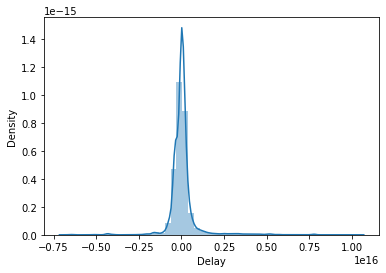

In [42]:
# Plotting
sns.distplot(train_data['Delay'])

<AxesSubplot:xlabel='baseline_create_date', ylabel='Density'>

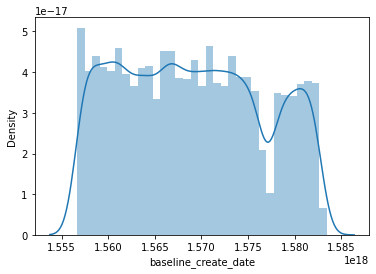

In [43]:
sns.distplot(train_data['baseline_create_date'])

<AxesSubplot:xlabel='due_in_date', ylabel='Density'>

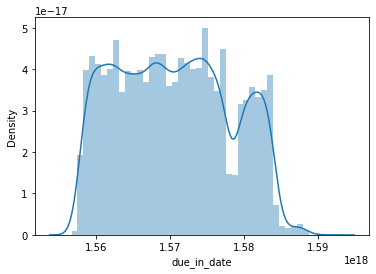

In [44]:
sns.distplot(train_data['due_in_date'])

<AxesSubplot:xlabel='document_create_date', ylabel='Density'>

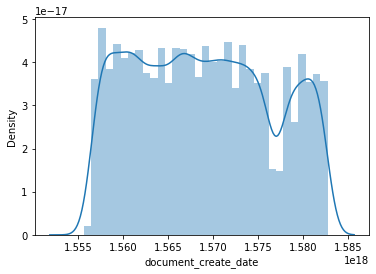

In [45]:
sns.distplot(train_data['document_create_date'])

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

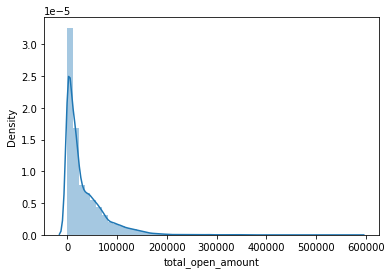

In [46]:
sns.distplot(train_data['total_open_amount'])

In [47]:
# Checking information about the columns and rows
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27477 entries, 0 to 27476
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27477 non-null  object        
 1   cust_number           27477 non-null  object        
 2   name_customer         27477 non-null  object        
 3   clear_date            27477 non-null  datetime64[ns]
 4   buisness_year         27477 non-null  float64       
 5   doc_id                27477 non-null  float64       
 6   posting_date          27477 non-null  datetime64[ns]
 7   document_create_date  27477 non-null  datetime64[ns]
 8   due_in_date           27477 non-null  datetime64[ns]
 9   invoice_currency      27477 non-null  object        
 10  total_open_amount     27477 non-null  float64       
 11  baseline_create_date  27477 non-null  datetime64[ns]
 12  cust_payment_terms    27477 non-null  object        
 13  Delay           

<AxesSubplot:xlabel='Delay', ylabel='total_open_amount'>

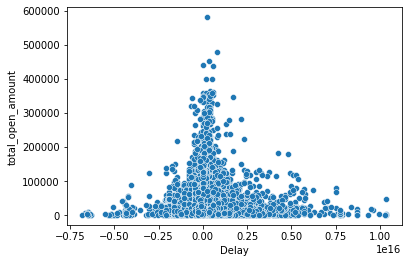

In [48]:
sns.scatterplot(train_data['Delay'],train_data['total_open_amount'])

In [49]:
# Checking the Unique columns 
train_data.cust_payment_terms.nunique()

61

In [50]:
# counting the values of cust_paymeent_terms
train_data.cust_payment_terms.value_counts()

NAA8    11059
NAH4     7279
CA10     2211
NAC6      934
NAM4      786
        ...  
NABD        1
B052        1
NAV2        1
NAUN        1
BR12        1
Name: cust_payment_terms, Length: 61, dtype: int64

<AxesSubplot:xlabel='Delay', ylabel='Density'>

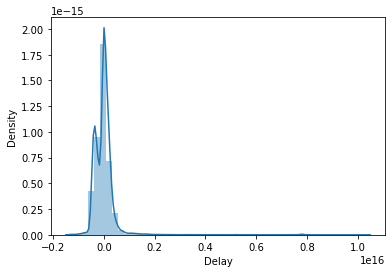

In [51]:
# training the data and plotting
X=train_data[train_data.cust_payment_terms.isin(['NAA8','NAH4'])]
sns.distplot(X['Delay'])

<AxesSubplot:xlabel='Delay', ylabel='Density'>

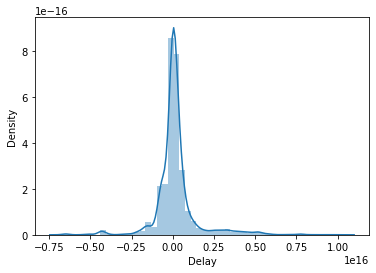

In [52]:
# training the dataset which is not there and plotting
X=train_data[~train_data.cust_payment_terms.isin(['NAA8','NAH4'])]
sns.distplot(X['Delay'])

In [53]:
#Counting the values of business_code
train_data.business_code.value_counts()

U001    24762
CA02     2274
U013      341
U002       95
U005        3
U007        2
Name: business_code, dtype: int64

<AxesSubplot:xlabel='Delay', ylabel='Density'>

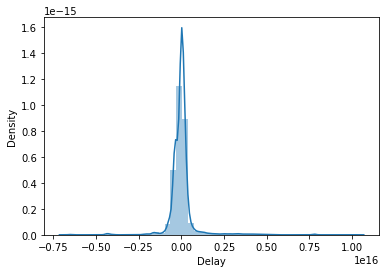

In [54]:
# Training and plotting of businesss_code 
X=train_data[train_data.business_code.isin(['U001'])]
sns.distplot(X['Delay'])

<AxesSubplot:xlabel='Delay', ylabel='Density'>

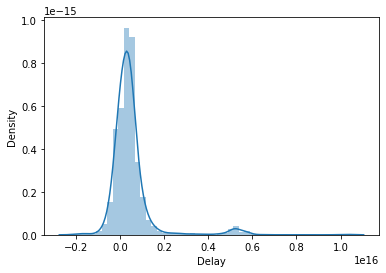

In [55]:
# Training and plotting of businesss_code 
X=train_data[train_data.business_code.isin(['CA02'])]
sns.distplot(X['Delay'])

<AxesSubplot:xlabel='Delay', ylabel='Density'>

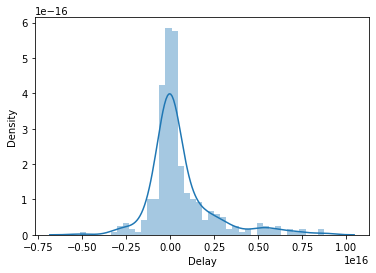

In [56]:
# Training and plotting of businesss_code 
X=train_data[train_data.business_code.isin(['U013'])]
sns.distplot(X['Delay'])

<AxesSubplot:xlabel='Delay', ylabel='Density'>

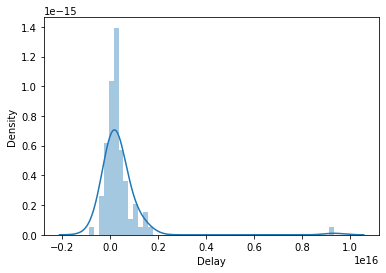

In [57]:
# Training and plotting of businesss_code 
X=train_data[train_data.business_code.isin(['U002'])]
sns.distplot(X['Delay'])

<AxesSubplot:xlabel='Delay', ylabel='Density'>

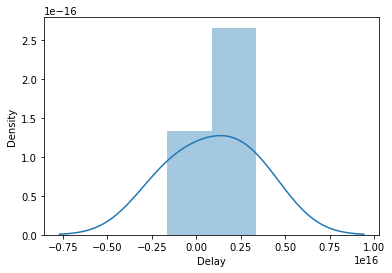

In [58]:
# Training and plotting of businesss_code 
X=train_data[train_data.business_code.isin(['U005'])]
sns.distplot(X['Delay'])

<AxesSubplot:xlabel='Delay', ylabel='Density'>

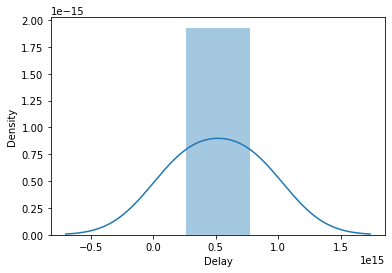

In [59]:
# Training and plotting of businesss_code 
X=train_data[train_data.business_code.isin(['U007'])]
sns.distplot(X['Delay'])

# Invoice Currency

In [60]:
# counting the values  of inivoice_currency
train_data.invoice_currency.value_counts()

USD    25202
CAD     2275
Name: invoice_currency, dtype: int64

<AxesSubplot:xlabel='Delay', ylabel='Density'>

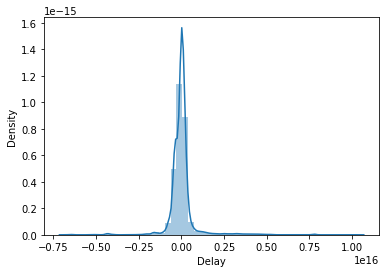

In [61]:
# trainnig and plotting
X=train_data[train_data.invoice_currency.isin(['USD'])] 
sns.distplot(X['Delay'])

<AxesSubplot:xlabel='Delay', ylabel='Density'>

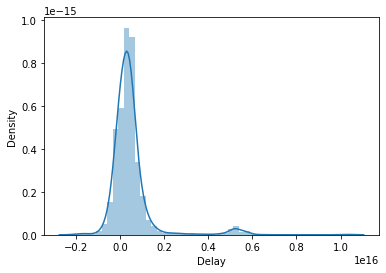

In [62]:
# trainnig and plotting
X=train_data[train_data.invoice_currency.isin(['CAD'])] 
sns.distplot(X['Delay'])

In [63]:
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,U001,0200424504,M systems,2019-05-16,2019.0,1.929113e+09,2019-04-10,2019-04-09,2019-05-15,USD,3444.41,2019-05-15,NATJ,86400000000000
1,CA02,140104240,FEDER in,2019-05-07,2019.0,2.960543e+09,2019-04-23,2019-04-23,2019-05-11,CAD,4466.25,2019-05-01,CA10,-345600000000000
2,CA02,0140104409,LOB us,2019-05-10,2019.0,2.960544e+09,2019-04-24,2019-04-24,2019-05-11,CAD,118300.93,2019-05-01,CA10,-86400000000000
3,CA02,0140104440,SO foundation,2019-05-15,2019.0,2.960544e+09,2019-04-24,2019-04-24,2019-05-11,CAD,161796.72,2019-05-01,CA10,345600000000000
4,CA02,0140104409,LOB associates,2019-05-17,2019.0,2.960545e+09,2019-04-25,2019-04-25,2019-05-14,CAD,52388.75,2019-05-04,CA10,259200000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27472,U001,0200705742,DOT associates,2020-03-30,2020.0,1.930566e+09,2020-02-26,2020-02-25,2020-03-31,USD,4122.58,2020-02-26,NAAW,-86400000000000
27473,U001,0200792734,MDV/ in,2020-03-11,2020.0,1.930570e+09,2020-02-26,2020-02-26,2020-03-12,USD,25295.18,2020-02-26,NAA8,-86400000000000
27474,U001,0200769623,WAL-MAR,2020-03-09,2020.0,1.930570e+09,2020-02-26,2020-02-25,2020-03-12,USD,7371.22,2020-02-26,NAH4,-259200000000000
27475,U001,0200777735,NASH trust,2020-03-11,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-13,USD,141239.93,2020-02-27,NAA8,-172800000000000


# Feature Engineering

In [64]:
# Correlation of the dataset train_data
train_data.corr()

,buisness_year,doc_id,total_open_amount,Delay
buisness_year,1.000000,-0.017386,-0.016501,-0.002941
doc_id,-0.017386,1.000000,0.172948,0.155441
total_open_amount,-0.016501,0.172948,1.000000,0.020540
Delay,-0.002941,0.155441,0.020540,1.000000


In [65]:
# Encoding
train_data['invoice_currency_enc']=train_data['invoice_currency'].map({'USD':1,'CAD':0})
train_data['business_code_enc']=train_data['business_code'].map({'U001':1,'CA02':0,'U013':0,'U002':0,'U005':0,'U007':0})
train_data['cust_payment_enc']=np.where(train_data.cust_payment_terms.isin(['NAA8']),2,1)

In [66]:
#Label Encoding for cust_number
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(train_data['cust_number'])
train_data['cust_number_enc']=cust_number_encoder.transform(train_data['cust_number'])

In [67]:
train_data.drop(['cust_number'],inplace =True ,axis=1)

In [68]:
#Label Encoding for cust_number
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(train_data['name_customer'])
train_data['name_customer_enc']=name_customer_encoder.transform(train_data['name_customer'])

In [69]:
train_data.drop(['name_customer'],inplace =True ,axis=1)

In [70]:
train_data.cust_payment_enc.value_counts()

1    16418
2    11059
Name: cust_payment_enc, dtype: int64

In [71]:
#Correlation 
train_data.corr()

,buisness_year,doc_id,total_open_amount,Delay,invoice_currency_enc,business_code_enc,cust_payment_enc,cust_number_enc,name_customer_enc
buisness_year,1.000000,-0.017386,-0.016501,-0.002941,0.018221,0.018064,-0.005172,-0.021432,-0.017251
doc_id,-0.017386,1.000000,0.172948,0.155441,-0.999420,-0.918160,-0.248982,-0.460763,-0.020197
total_open_amount,-0.016501,0.172948,1.000000,0.020540,-0.173513,-0.147321,0.116197,-0.091413,-0.012037
Delay,-0.002941,0.155441,0.020540,1.000000,-0.153599,-0.171407,0.043457,0.074532,-0.023073
invoice_currency_enc,0.018221,-0.999420,-0.173513,-0.153599,1.000000,0.907363,0.246049,0.458017,0.019050
business_code_enc,0.018064,-0.918160,-0.147321,-0.171407,0.907363,1.000000,0.271017,0.463452,0.034607
cust_payment_enc,-0.005172,-0.248982,0.116197,0.043457,0.246049,0.271017,1.000000,-0.042667,-0.181429
cust_number_enc,-0.021432,-0.460763,-0.091413,0.074532,0.458017,0.463452,-0.042667,1.000000,0.175283
name_customer_enc,-0.017251,-0.020197,-0.012037,-0.023073,0.019050,0.034607,-0.181429,0.175283,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

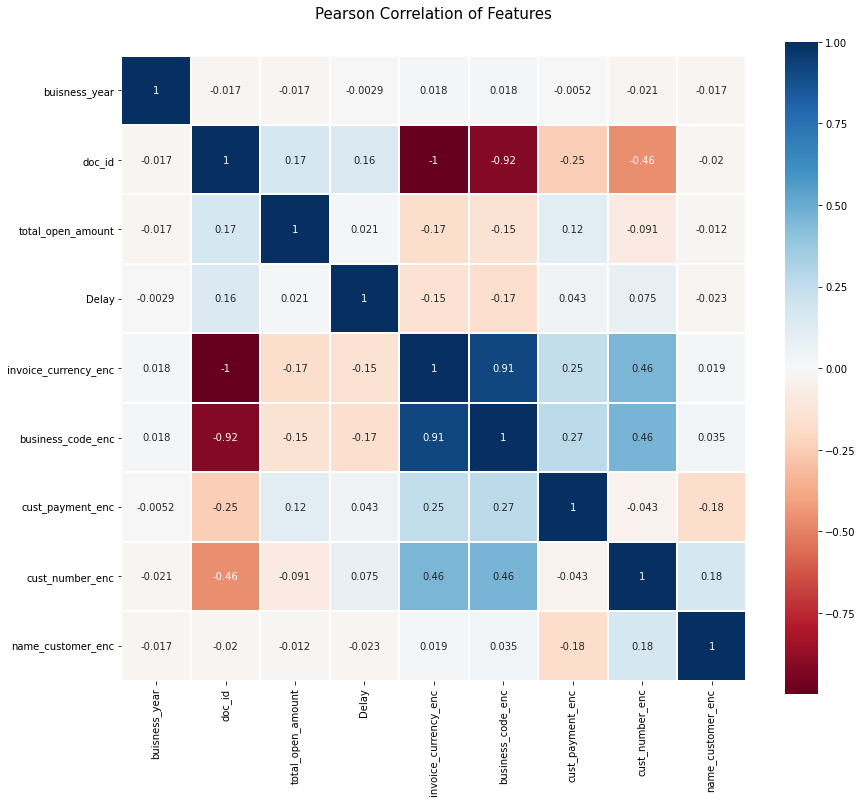

In [72]:
# plotting the heatmap

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [73]:
# Feature selection
features_selected=['invoice_currency_enc','business_code_enc','cust_payment_enc','cust_number_enc','name_customer_enc']

In [74]:
# Seleccted features 
train_data_main_X=train_data[features_selected]

In [75]:
train_data_main_Y=train_data['Delay']
train_data_main_Y.shape,train_data_main_X.shape

((27477,), (27477, 5))

In [76]:
train_data_main_X

,invoice_currency_enc,business_code_enc,cust_payment_enc,cust_number_enc,name_customer_enc
0,1,1,1,493,1846
1,0,0,1,927,1036
2,0,0,1,305,1834
3,0,0,1,309,2764
4,0,0,1,305,1825
...,...,...,...,...,...
27472,1,1,1,599,915
27473,1,1,2,793,2004
27474,1,1,1,732,3229
27475,1,1,2,747,2127


In [77]:
train_data_main_Y

0         86400000000000
1       -345600000000000
2        -86400000000000
3        345600000000000
4        259200000000000
              ...       
27472    -86400000000000
27473    -86400000000000
27474   -259200000000000
27475   -172800000000000
27476    604800000000000
Name: Delay, Length: 27477, dtype: int64

In [78]:
# Encoding of test_data
test_data['invoice_currency_enc']=test_data['invoice_currency'].map({'USD':1,'CAD':0})
test_data['business_code_enc']=test_data['business_code'].map({'U001':1,'CA02':0,'U013':0,'U002':0,'U005':0,'U007':0})
test_data['cust_payment_enc']=np.where(test_data.cust_payment_terms.isin(['NAA8']),2,1)

In [79]:
#Label Encoding for cust_number
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(test_data['cust_number'])
test_data['cust_number_enc']=cust_number_encoder.transform(test_data['cust_number'])

In [80]:
test_data.drop(['cust_number'],inplace =True ,axis=1)

In [81]:
#Label Encoding for cust_number
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(test_data['name_customer'])
test_data['name_customer_enc']=name_customer_encoder.transform(test_data['name_customer'])

In [82]:
test_data.drop(['name_customer'],inplace =True ,axis=1)

In [83]:
test_data.head()

,business_code,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay,invoice_currency_enc,business_code_enc,cust_payment_enc,cust_number_enc,name_customer_enc
13247,U001,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,17304.48,2018-12-30,NAH4,-432000000000000,1,1,1,534,2091
24073,CA02,2019-01-25,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,CAD,131641.53,2018-12-30,CA10,1382400000000000,0,0,1,234,2086
11805,U001,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,66410.81,2018-12-30,NAH4,-432000000000000,1,1,1,534,2096
12733,U001,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,27527.96,2018-12-30,NAH4,-432000000000000,1,1,1,534,2095
16719,U001,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,44582.31,2018-12-30,NAH4,-432000000000000,1,1,1,534,2094


In [85]:
# Resetting index of test_data
test_data.reset_index(inplace=True)
test_data.drop(columns=['index'],inplace=True) 

In [86]:
test_data_main_Y=test_data['Delay']

In [87]:
# features selected
test_data_main_X=test_data[features_selected]

In [88]:
test_data_main_X

,invoice_currency_enc,business_code_enc,cust_payment_enc,cust_number_enc,name_customer_enc
0,1,1,1,534,2091
1,0,0,1,234,2086
2,1,1,1,534,2096
3,1,1,1,534,2095
4,1,1,1,534,2094
...,...,...,...,...,...
11645,1,1,1,328,475
11646,1,1,1,605,475
11647,1,1,1,605,475
11648,0,0,1,197,1132


In [89]:
test_data_main_Y

0         -432000000000000
1         1382400000000000
2         -432000000000000
3         -432000000000000
4         -432000000000000
               ...        
11645     1641600000000000
11646       86400000000000
11647      345600000000000
11648    14256000000000000
11649    13996800000000000
Name: Delay, Length: 11650, dtype: int64

# Simple Linear Regression

In [103]:
# Fitting Simple Linear Regression to the Training Set

clf = LinearRegression()
clf.fit(train_data_main_X, train_data_main_Y)

# Predicting the Test Set Results
predicted = clf.predict(test_data_main_X)

In [104]:
# mean_squared_error
mean_squared_error(test_data_main_Y, predicted)
r2_score(test_data_main_Y, predicted)

0.03554755887381278

In [105]:
mean_squared_error(test_data_main_Y, predicted)

1.398832492032844e+30

# Tree based model

In [94]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [95]:
regressor.fit(train_data_main_X, train_data_main_Y)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [96]:
y_predict2 = regressor.predict(test_data_main_X)

In [101]:
mean_squared_error(test_data_main_Y, y_predict2)

1.4450008157763733e+30

## working with clear_date==null

In [102]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
18,U001,0200782772,ASSOC G us,NaN,2020.0,1.930803e+09,2020-04-20,20200420,20200420,20200505.0,USD,RV,1.0,55543.60,20200420.0,NAA8,1.930803e+09,1
30,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930757e+09,2020-04-07,20200406,20200407,20200422.0,USD,RV,1.0,446.22,20200407.0,NAH4,1.930757e+09,1
34,U001,0200416837,DEC in,NaN,2020.0,1.930745e+09,2020-04-04,20200404,20200404,20200424.0,USD,RV,1.0,7659.96,20200401.0,NAM4,1.930745e+09,1
38,U001,0200705742,DOT foundation,NaN,2020.0,1.930734e+09,2020-03-31,20200402,20200331,20200502.0,USD,RV,1.0,22862.24,20200331.0,NA32,1.930734e+09,1
40,U001,0200726979,BJ'S corporation,NaN,2020.0,1.930726e+09,2020-04-01,20200331,20200401,20200416.0,USD,RV,1.0,219.46,20200401.0,NAA8,1.930726e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,0200749782,KROG corporation,NaN,2020.0,1.930714e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,5158.54,20200328.0,NAA8,1.930714e+09,1
49971,U001,0200744019,TARG foundation,NaN,2020.0,1.930768e+09,2020-04-10,20200409,20200410,20200425.0,USD,RV,1.0,14081.97,20200410.0,NAA8,1.930768e+09,1
49981,U001,0200769623,WAL-MAR,NaN,2020.0,1.930809e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,661.11,20200423.0,NAH4,1.930809e+09,1
49984,U001,0200794332,COST us,NaN,2020.0,1.930699e+09,2020-03-26,20200325,20200326,20200410.0,USD,RV,1.0,26024.90,20200326.0,NAAX,1.930699e+09,1


In [99]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [100]:
main_test.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [136]:
# Converting the date and time 
main_test['posting_date']= pd.to_datetime(main_test['posting_date'])
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'], format='%Y%m%d')
main_test['document_create_date.1'] = pd.to_datetime(main_test['document_create_date.1'], format='%Y%m%d')
main_test['baseline_create_date'] = pd.to_datetime(main_test['baseline_create_date'], format='%Y%m%d')
main_test['document_create_date'] = pd.to_datetime(main_test['document_create_date'], format='%Y%m%d')

In [106]:
X_main_test = main_test.drop(['clear_date'],axis=1)

# ALSO LETS DROP CLEAR_DATE FROM MAIN TEST ITSELF
main_test.drop(['clear_date'], inplace =True,axis=1)

In [107]:
X_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
18,U001,0200782772,ASSOC G us,2020.0,1.930803e+09,2020-04-20,20200420,20200420,20200505.0,USD,RV,1.0,55543.60,20200420.0,NAA8,1.930803e+09,1
30,U001,0200769623,WAL-MAR us,2020.0,1.930757e+09,2020-04-07,20200406,20200407,20200422.0,USD,RV,1.0,446.22,20200407.0,NAH4,1.930757e+09,1
34,U001,0200416837,DEC in,2020.0,1.930745e+09,2020-04-04,20200404,20200404,20200424.0,USD,RV,1.0,7659.96,20200401.0,NAM4,1.930745e+09,1
38,U001,0200705742,DOT foundation,2020.0,1.930734e+09,2020-03-31,20200402,20200331,20200502.0,USD,RV,1.0,22862.24,20200331.0,NA32,1.930734e+09,1
40,U001,0200726979,BJ'S corporation,2020.0,1.930726e+09,2020-04-01,20200331,20200401,20200416.0,USD,RV,1.0,219.46,20200401.0,NAA8,1.930726e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,0200749782,KROG corporation,2020.0,1.930714e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,5158.54,20200328.0,NAA8,1.930714e+09,1
49971,U001,0200744019,TARG foundation,2020.0,1.930768e+09,2020-04-10,20200409,20200410,20200425.0,USD,RV,1.0,14081.97,20200410.0,NAA8,1.930768e+09,1
49981,U001,0200769623,WAL-MAR,2020.0,1.930809e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,661.11,20200423.0,NAH4,1.930809e+09,1
49984,U001,0200794332,COST us,2020.0,1.930699e+09,2020-03-26,20200325,20200326,20200410.0,USD,RV,1.0,26024.90,20200326.0,NAAX,1.930699e+09,1


In [108]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 18 to 49990
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   buisness_year           10000 non-null  float64
 4   doc_id                  10000 non-null  float64
 5   posting_date            10000 non-null  object 
 6   document_create_date    10000 non-null  int64  
 7   document_create_date.1  10000 non-null  int64  
 8   due_in_date             10000 non-null  float64
 9   invoice_currency        10000 non-null  object 
 10  document type           10000 non-null  object 
 11  posting_id              10000 non-null  float64
 12  total_open_amount       10000 non-null  float64
 13  baseline_create_date    10000 non-null  float64
 14  cust_payment_terms      10000 non-nul

In [109]:
# Encoding of X_main_test
X_main_test['invoice_currency_enc']=X_main_test['invoice_currency'].map({'USD':1,'CAD':0})
X_main_test['business_code_enc']=X_main_test['business_code'].map({'U001':1,'CA02':0,'U013':0,'U002':0,'U005':0,'U007':0})
X_main_test['cust_payment_enc']=np.where(X_main_test.cust_payment_terms.isin(['NAA8']),2,1)

In [110]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 18 to 49990
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   buisness_year           10000 non-null  float64
 4   doc_id                  10000 non-null  float64
 5   posting_date            10000 non-null  object 
 6   document_create_date    10000 non-null  int64  
 7   document_create_date.1  10000 non-null  int64  
 8   due_in_date             10000 non-null  float64
 9   invoice_currency        10000 non-null  object 
 10  document type           10000 non-null  object 
 11  posting_id              10000 non-null  float64
 12  total_open_amount       10000 non-null  float64
 13  baseline_create_date    10000 non-null  float64
 14  cust_payment_terms      10000 non-nul

In [111]:
X_main_test.drop(['business_code','invoice_currency','cust_payment_terms'],inplace =True ,axis=1)

In [112]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 18 to 49990
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             10000 non-null  object 
 1   name_customer           10000 non-null  object 
 2   buisness_year           10000 non-null  float64
 3   doc_id                  10000 non-null  float64
 4   posting_date            10000 non-null  object 
 5   document_create_date    10000 non-null  int64  
 6   document_create_date.1  10000 non-null  int64  
 7   due_in_date             10000 non-null  float64
 8   document type           10000 non-null  object 
 9   posting_id              10000 non-null  float64
 10  total_open_amount       10000 non-null  float64
 11  baseline_create_date    10000 non-null  float64
 12  invoice_id              10000 non-null  float64
 13  isOpen                  10000 non-null  int64  
 14  invoice_currency_enc    10000 non-nul

In [113]:
#Label Encoding for cust_number
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_main_test['name_customer'])
X_main_test['name_customer_enc']=name_customer_encoder.transform(X_main_test['name_customer'])

In [114]:
X_main_test.drop(['name_customer'],inplace =True ,axis=1)

In [115]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 18 to 49990
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             10000 non-null  object 
 1   buisness_year           10000 non-null  float64
 2   doc_id                  10000 non-null  float64
 3   posting_date            10000 non-null  object 
 4   document_create_date    10000 non-null  int64  
 5   document_create_date.1  10000 non-null  int64  
 6   due_in_date             10000 non-null  float64
 7   document type           10000 non-null  object 
 8   posting_id              10000 non-null  float64
 9   total_open_amount       10000 non-null  float64
 10  baseline_create_date    10000 non-null  float64
 11  invoice_id              10000 non-null  float64
 12  isOpen                  10000 non-null  int64  
 13  invoice_currency_enc    10000 non-null  int64  
 14  business_code_enc       10000 non-nul

In [116]:
X_main_test

,cust_number,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen,invoice_currency_enc,business_code_enc,cust_payment_enc,name_customer_enc
18,0200782772,2020.0,1.930803e+09,2020-04-20,20200420,20200420,20200505.0,RV,1.0,55543.60,20200420.0,1.930803e+09,1,1,1,2,106
30,0200769623,2020.0,1.930757e+09,2020-04-07,20200406,20200407,20200422.0,RV,1.0,446.22,20200407.0,1.930757e+09,1,1,1,1,1721
34,0200416837,2020.0,1.930745e+09,2020-04-04,20200404,20200404,20200424.0,RV,1.0,7659.96,20200401.0,1.930745e+09,1,1,1,1,416
38,0200705742,2020.0,1.930734e+09,2020-03-31,20200402,20200331,20200502.0,RV,1.0,22862.24,20200331.0,1.930734e+09,1,1,1,1,500
40,0200726979,2020.0,1.930726e+09,2020-04-01,20200331,20200401,20200416.0,RV,1.0,219.46,20200401.0,1.930726e+09,1,1,1,2,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,0200749782,2020.0,1.930714e+09,2020-03-28,20200328,20200328,20200412.0,RV,1.0,5158.54,20200328.0,1.930714e+09,1,1,1,2,887
49971,0200744019,2020.0,1.930768e+09,2020-04-10,20200409,20200410,20200425.0,RV,1.0,14081.97,20200410.0,1.930768e+09,1,1,1,2,1595
49981,0200769623,2020.0,1.930809e+09,2020-04-23,20200422,20200423,20200508.0,RV,1.0,661.11,20200423.0,1.930809e+09,1,1,1,1,1711
49984,0200794332,2020.0,1.930699e+09,2020-03-26,20200325,20200326,20200410.0,RV,1.0,26024.90,20200326.0,1.930699e+09,1,1,1,1,380


In [117]:
# viewing column header
X_main_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'posting_date',
       'document_create_date', 'document_create_date.1', 'due_in_date',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'invoice_id', 'isOpen', 'invoice_currency_enc',
       'business_code_enc', 'cust_payment_enc', 'name_customer_enc'],
      dtype='object')

In [118]:
# deleting the rest of the parts of the dataframe
X_main_test.drop(['buisness_year','doc_id','posting_id','total_open_amount','invoice_id','isOpen'],inplace =True ,axis=1)

In [119]:
X_main_test.drop(['document type'],inplace =True ,axis=1)

In [ ]:
X_main_test.drop(['document type'],inplace =True ,axis=1)

In [122]:
X_main_test.drop(['cust_number'],inplace =True ,axis=1)

In [124]:
X_main_test

,posting_date,document_create_date,document_create_date.1,due_in_date,baseline_create_date,invoice_currency_enc,business_code_enc,cust_payment_enc,name_customer_enc
18,2020-04-20,20200420,20200420,20200505.0,20200420.0,1,1,2,106
30,2020-04-07,20200406,20200407,20200422.0,20200407.0,1,1,1,1721
34,2020-04-04,20200404,20200404,20200424.0,20200401.0,1,1,1,416
38,2020-03-31,20200402,20200331,20200502.0,20200331.0,1,1,1,500
40,2020-04-01,20200331,20200401,20200416.0,20200401.0,1,1,2,207
...,...,...,...,...,...,...,...,...,...
49963,2020-03-28,20200328,20200328,20200412.0,20200328.0,1,1,2,887
49971,2020-04-10,20200409,20200410,20200425.0,20200410.0,1,1,2,1595
49981,2020-04-23,20200422,20200423,20200508.0,20200423.0,1,1,1,1711
49984,2020-03-26,20200325,20200326,20200410.0,20200326.0,1,1,1,380


In [125]:
# viewing column header
X_main_test.columns

Index(['posting_date', 'document_create_date', 'document_create_date.1',
       'due_in_date', 'baseline_create_date', 'invoice_currency_enc',
       'business_code_enc', 'cust_payment_enc', 'name_customer_enc'],
      dtype='object')

In [ ]:
# deleting the rest of the parts of the dataframe
X_main_test.drop(['posting_date','document_create_date','document_create_date','due_in_date'],inplace =True ,axis=1)

In [129]:
X_main_test.drop(['baseline_create_date'],inplace =True ,axis=1)

# Predicting

In [137]:
final_result = regressor.predict(X_main_test)

In [138]:
final_result = pd.Series(final_result,name='Predicted_date')

In [139]:
# resetting the index of main test so that we can merge Predicted_date series with it
main_test.reset_index(drop=True,inplace=True)

In [140]:
Final = main_test.merge(final_result , on = X_main_test.index )

In [141]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Predicted_date
0,18,U001,0200782772,ASSOC G us,2020.0,1.930803e+09,2020-04-20,2020-04-20,2020-04-20,2020-05-05,USD,RV,1.0,55543.60,2020-04-20,NAA8,1.930803e+09,1,-1.729329e+15
1,30,U001,0200769623,WAL-MAR us,2020.0,1.930757e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,446.22,2020-04-07,NAH4,1.930757e+09,1,-1.692402e+14
2,34,U001,0200416837,DEC in,2020.0,1.930745e+09,2020-04-04,2020-04-04,2020-04-04,2020-04-24,USD,RV,1.0,7659.96,2020-04-01,NAM4,1.930745e+09,1,-1.692402e+14
3,38,U001,0200705742,DOT foundation,2020.0,1.930734e+09,2020-03-31,2020-04-02,2020-03-31,2020-05-02,USD,RV,1.0,22862.24,2020-03-31,NA32,1.930734e+09,1,-1.692402e+14
4,40,U001,0200726979,BJ'S corporation,2020.0,1.930726e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,USD,RV,1.0,219.46,2020-04-01,NAA8,1.930726e+09,1,-1.692402e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49963,U001,0200749782,KROG corporation,2020.0,1.930714e+09,2020-03-28,2020-03-28,2020-03-28,2020-04-12,USD,RV,1.0,5158.54,2020-03-28,NAA8,1.930714e+09,1,-1.692402e+14
9996,49971,U001,0200744019,TARG foundation,2020.0,1.930768e+09,2020-04-10,2020-04-09,2020-04-10,2020-04-25,USD,RV,1.0,14081.97,2020-04-10,NAA8,1.930768e+09,1,-1.692402e+14
9997,49981,U001,0200769623,WAL-MAR,2020.0,1.930809e+09,2020-04-23,2020-04-22,2020-04-23,2020-05-08,USD,RV,1.0,661.11,2020-04-23,NAH4,1.930809e+09,1,-1.692402e+14
9998,49984,U001,0200794332,COST us,2020.0,1.930699e+09,2020-03-26,2020-03-25,2020-03-26,2020-04-10,USD,RV,1.0,26024.90,2020-03-26,NAAX,1.930699e+09,1,-1.692402e+14


In [142]:
Final.dtypes

key_0                              int64
business_code                     object
cust_number                       object
name_customer                     object
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
Predicted_date                   float64
dtype: object